In [7]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

conn = sqlite3.connect("data/database.db")

In [8]:
df = pd.read_sql_query("SELECT * FROM price_data", conn)

In [29]:
expert_prior_params = {row[0]: (row[1], row[2]) for row in df.groupby("ticker").agg({"return_1d":["mean","std"]}).reset_index().values}
expert_prior_params

{'A': (0.0006686079970754248, 0.015657271041254677),
 'AAPL': (0.0011379314485052442, 0.01695666220142055),
 'ABBV': (0.0008139203370759869, 0.01555844182019891),
 'ABNB': (0.0002513807905487188, 0.03193765090992256),
 'ABT': (0.0006430109599584076, 0.013683408814318041),
 'ACGL': (0.0007064746362299582, 0.014613424218778356),
 'ACN': (0.0007303505352990601, 0.014365999349985241),
 'ADBE': (0.0011211458204598728, 0.018985269749795156),
 'ADI': (0.0008224324304443372, 0.017968368041257923),
 'ADM': (0.00047036905830680074, 0.015235526144987027),
 'ADP': (0.0007316740316326364, 0.01358481040179279),
 'ADSK': (0.0008795327590566952, 0.021277594241187157),
 'AEE': (0.0005244960490320502, 0.01243458563625521),
 'AEP': (0.0004109838584392722, 0.011974086112606907),
 'AES': (0.0005408223184731433, 0.018959079240433815),
 'AFL': (0.0005731408566512639, 0.013007309184009242),
 'AIG': (0.0005090544031579816, 0.018138546899756663),
 'AIZ': (0.0006955927754581357, 0.014618766512194518),
 'AJG': (0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.gridspec import GridSpec

# Simulated expert_prior_params for 495 elements
np.random.seed(42)
tickers = [f"TICKER{i}" for i in range(1, 496)]
expert_prior_params = {ticker: (np.random.uniform(-0.1, 0.1), np.random.uniform(0.01, 0.05)) for ticker in tickers}

# Plot parameters
colors = plt.cm.viridis(np.linspace(0, 1, len(expert_prior_params)))
num_plots = len(expert_prior_params)
cols = 5  # Fixed number of columns
rows = int(np.ceil(num_plots / cols))  # Dynamically determine rows

# Create figure with subplots
fig = plt.figure(figsize=(15, rows * 3))
grid = GridSpec(rows, cols, figure=fig)

# Generate plots
x = np.linspace(-0.15, 0.15, 100)

for i, (name, params) in enumerate(expert_prior_params.items()):
    row, col = divmod(i, cols)
    ax = fig.add_subplot(grid[row, col])
    
    # Calculate the normal distribution
    y = norm.pdf(x, params[0], scale=params[1])
    
    # Plot
    ax.fill_between(x, 0, y, color=colors[i], linewidth=2, edgecolor=colors[i], alpha=0.6)
    ax.set_title(name, fontsize=8)
    ax.axvline(0, color='k', linestyle='--', linewidth=0.5)
    ax.set_xlim(-0.15, 0.15)
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout
plt.tight_layout()
plt.show()


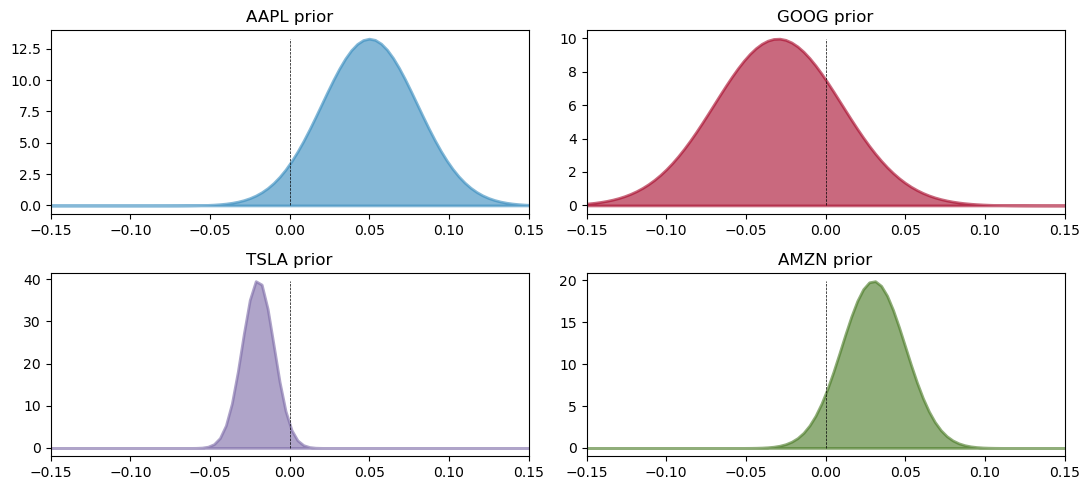

In [28]:
figsize(11., 5)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

normal = stats.norm
x = np.linspace(df["return_1d"].min(), df["return_1d"].max(), 100)

expert_prior_params = {"AAPL":(0.05, 0.03),
                 "GOOG":(-0.03, 0.04), 
                 "TSLA": (-0.02, 0.01), 
                 "AMZN": (0.03, 0.02), 
                 }

for i, (name, params) in enumerate(expert_prior_params.items()):
    plt.subplot(2, 2, i+1)
    y = normal.pdf(x, params[0], scale = params[1])
    #plt.plot( x, y, c = colors[i] )
    plt.fill_between(x, 0, y, color = colors[i], linewidth=2,
                     edgecolor = colors[i], alpha = 0.6)
    plt.title(name + " prior")
    plt.vlines(0, 0, y.max(), "k","--", linewidth = 0.5)
    plt.xlim(-0.15, 0.15)
plt.tight_layout()